In [99]:
import mglearn.plots
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
my_iris = load_iris()  # 第一个数据集，鸢尾花数据集
#注：此处如果安装scikit-learn版本==1.2的话导入数据会报错，需安装scikit-learn版本==1.1.1


# print(my_iris.keys())
# print(my_iris.feature_names)
# print(my_iris.target_names)
iris_X = my_iris.data[:,(2,3)]  # petal length，petal width
iris_y = (my_iris.target == 2).astype(np.float64)  # Iris virginica

random_X,random_y = mglearn.datasets.make_forge()  # 第二个数据集，随机生成二分类数据集

# 合并两个数据集
two_data_sets_X = [iris_X,random_X]
two_data_sets_y = [iris_y,random_y]
print(two_data_sets_y)
X_train, X_test, y_train, y_test = train_test_split(two_data_sets_X, two_data_sets_y, test_size=0.2, random_state=0)
print(y_test)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])]
[array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])]


IndexError: list index out of range

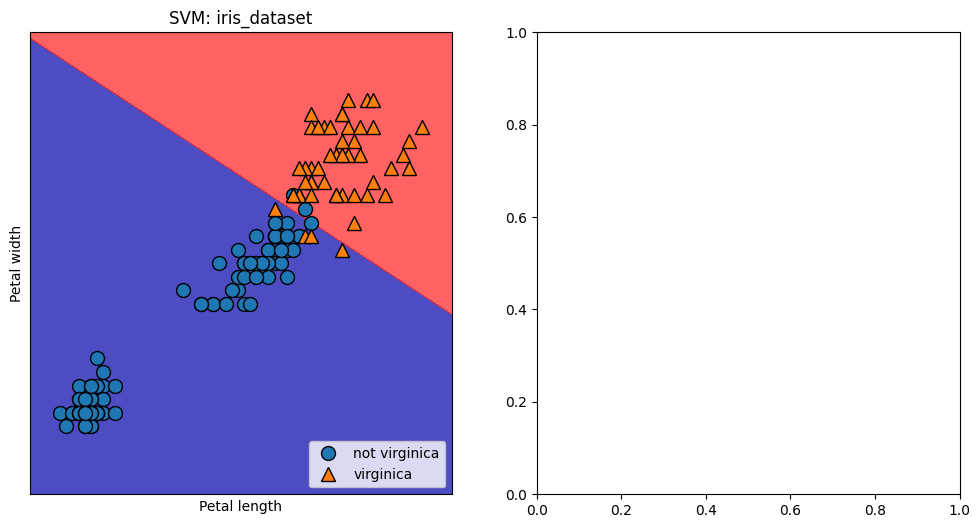

In [96]:
# SVM模型
svm_clf = Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1,loss="hinge")),])

fig,axes = plt.subplots(1,2,figsize=(12,6))
for i,ax in zip([0,1],axes):
    X = X_train[i]
    y = y_train[i]
    svm_clf.fit(X,y)
    mglearn.plots.plot_2d_separator(svm_clf,X,fill=True,eps=0.5,alpha=0.7,ax=ax)  # 不要忘记ax这个参数
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)  # 不要忘记ax这个参数
    if i == 0:
        ax.set_title("SVM: iris_dataset")
        ax.set_xlabel("Petal length")
        ax.set_ylabel("Petal width")
        ax.legend(["not virginica","virginica"],loc="lower right")
    else:
        ax.set_title("SVM: random_dataset")
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1")
        ax.legend(["class 0","class 1"],loc="lower right")
plt.show()

In [97]:
svm_clf_predict = svm_clf.predict(X_test)
acc_linearsvc = sum(svm_clf_predict==y_test)/len(y_test)

print(acc_linearsvc)

ValueError: Found array with dim 3. StandardScaler expected <= 2.